In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## DATASET

In [2]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<b>Data description:</b>

<b>Survived</b> - Survival (0 = No; 1 = Yes). Not included in test.csv file. <br>
<b>pclass</b> - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
<b>sex</b> - Sex <br>
<b>age</b> - Age <br>
<b>sibsp</b> - Number of Siblings/Spouses Aboard <br>
<b>parch</b> - Number of Parents/Children Aboard <br>
<b>embarked</b> - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) <br>
<b>class</b> - Dummy for pcclass <br>
<b>who</b> - Dummy for sex (gender)  <br>
<b>adult_male - Classification dummy for gender and age </b> -  <br>
<b>deck</b> -  <br>
<b>embark_town</b> - ..  <br>
<b>alive</b> - Dummy for survived <br>
<b>alone</b> -  Dummy for idividual person <br>



In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## Exploratory Data Analysis

<b>Visualizando valores faltantes</b>

In [5]:
total = titanic.isnull().sum().sort_values(ascending=False)
p_1 = titanic.isnull().sum()/titanic.isnull().count()*100
p_2 = (round(p_1, 2)).sort_values(ascending=False)

missing_data = pd.concat([total, p_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
deck,688,77.22
age,177,19.87
embark_town,2,0.22
embarked,2,0.22
alone,0,0.00


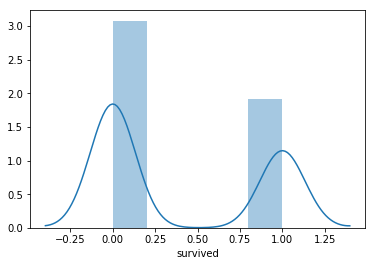

In [6]:
sns.distplot(titanic['survived'], kde = True)

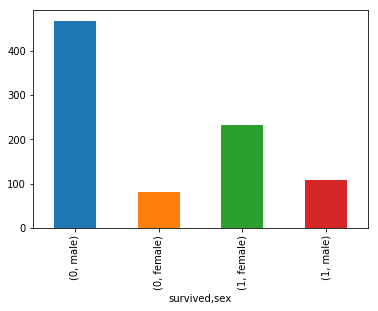

In [7]:
titanic.groupby('survived')['sex'].value_counts().plot(kind = 'bar')

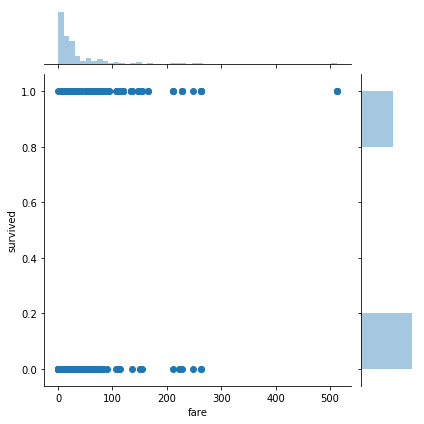

In [8]:
sns.jointplot(x='fare', y='survived', data=titanic)

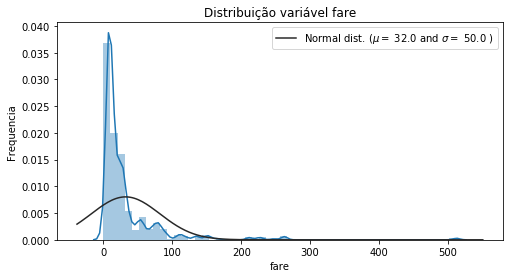

In [9]:
plt.figure(figsize=(8,4))
sns.distplot(titanic['fare'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(titanic['fare']) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição variável fare')

plt.show()

In [10]:
list(titanic)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

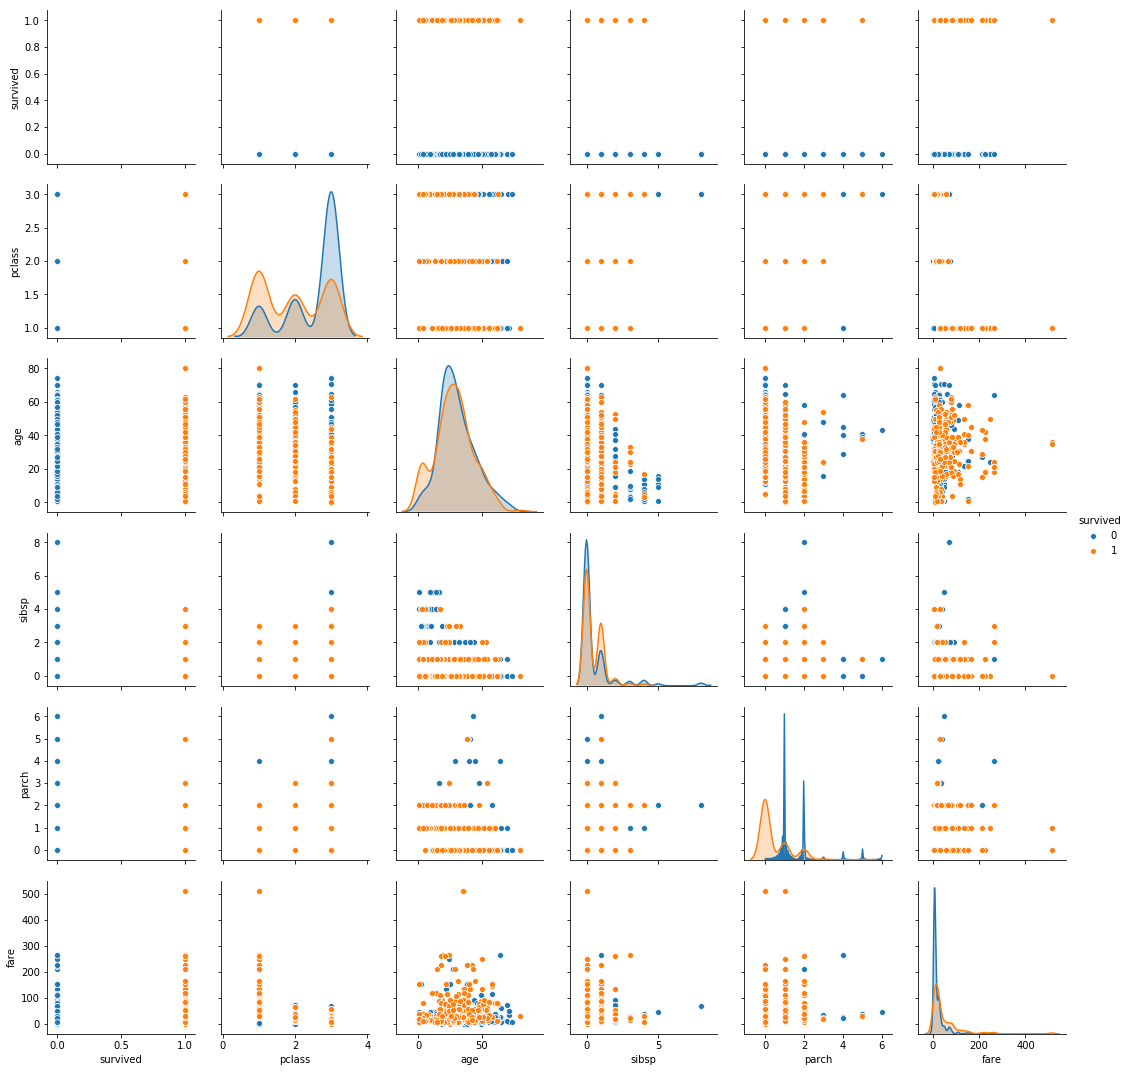

In [11]:
titanic_hist = titanic.drop(['embark_town', 'who', 'adult_male', 'alive', 'alone'], axis=1)
sns.pairplot(titanic_hist, hue = 'survived')

In [12]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [13]:
titanic['age'].value_counts(dropna = False).head()

NaN      177
 24.0     30
 22.0     27
 18.0     26
 28.0     25
Name: age, dtype: int64

## Feature Engineering

Duas variáveis chamam a atenção por term muitos valores faltantes. <br>
Tanto a IDADE quando a variável DECK parecem importantes para análise mas não podem serem usadas assim.

### DECK

In [14]:
titanic['n_deck'] = titanic['deck']

In [15]:
titanic['n_deck'] = titanic['n_deck'].map({'C':3, 'E':5, 'G':7, 'D':4, 'A':1, 'B':2, 'F':6})

In [16]:
titanic['n_deck'].fillna(value = 8, inplace = True)

In [17]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_deck
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,8.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,8.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,8.0


In [18]:
titanic['n_deck'].value_counts(dropna = False)

8.0    688
3.0     59
2.0     47
4.0     33
5.0     32
1.0     15
6.0     13
7.0      4
Name: n_deck, dtype: int64

In [19]:
titanic[['survived', 'n_deck']].corr()

,survived,n_deck
survived,1.000000,-0.294804
n_deck,-0.294804,1.000000


### IDADE

A variável era a segunda que mais tinha dados faltantes, por isso também precisa de atenção especial.<br>
Neste caso o método que eu adotei para sanar isso foi manter o padrão de distribuição das idades gerando números "aleatórios"<br>
dentro do intervalo de -1 a +1 desvios padrões, assim os dados tendem a mater a mesma distribuição.

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_deck
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,8.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,8.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,8.0


In [21]:
titanic['age'].value_counts(dropna = False).head()

NaN      177
 24.0     30
 22.0     27
 18.0     26
 28.0     25
Name: age, dtype: int64

In [22]:
titanic['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [23]:
%%time
mean = titanic['age'].mean()
std = titanic['age'].std()

i = 0

for i in range (titanic.shape[0]):
    if titanic['age'][[i]].isna().bool():
        titanic['age'][i] = np.random.randint(mean - std, mean + std)


CPU times: user 15.1 s, sys: 40.4 ms, total: 15.1 s
Wall time: 15.1 s


In [24]:
titanic['age'].value_counts(dropna = False).head()

18.0    37
24.0    34
22.0    32
25.0    32
30.0    32
Name: age, dtype: int64

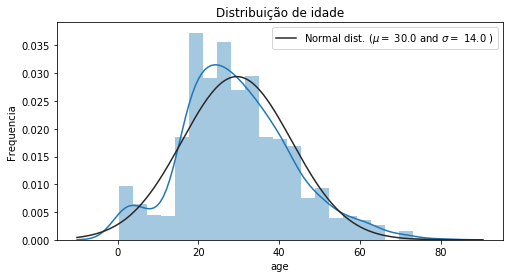

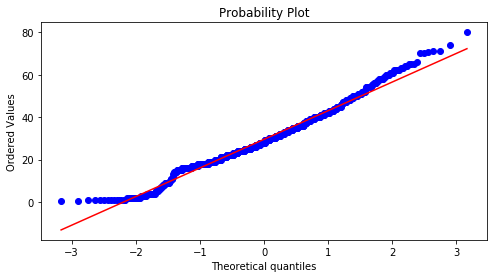

In [25]:
plt.figure(figsize=(8,4))
sns.distplot(titanic['age'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(titanic['age']) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição de idade')

fig = plt.figure(figsize=(8,4))
res = stats.probplot(titanic['age'], plot=plt)

plt.show()

In [26]:
titanic[['survived', 'age']].corr()

,survived,age
survived,1.000000,-0.054924
age,-0.054924,1.000000


### SEXO

Para a variável sexo apenas vou criar uma dummy.

In [27]:
titanic['sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [28]:
titanic['isFemale'] = np.where(titanic['sex'] == 'female',1,0)

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_deck,isFemale
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,8.0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,8.0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,8.0,0


In [30]:
titanic[['survived', 'isFemale']].corr()

,survived,isFemale
survived,1.000000,0.543351
isFemale,0.543351,1.000000


In [31]:
titanic['adult_male'].mean()

0.6026936026936027

### CIDADE DE EMBARQUE

Criando um dummy para variável embarque

In [32]:
titanic['dummy_embarked'] = titanic['embarked'].map({"S": 0, "C": 1, "Q": 2})

In [33]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_deck,isFemale,dummy_embarked
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,8.0,0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0,1,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,8.0,1,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.0,1,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,8.0,0,0.0


In [34]:
titanic[['survived', 'dummy_embarked']].corr()

,survived,dummy_embarked
survived,1.000000,0.108669
dummy_embarked,0.108669,1.000000


### FARE

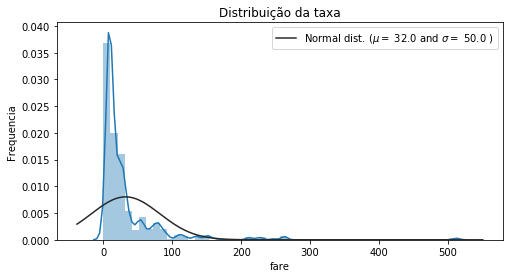

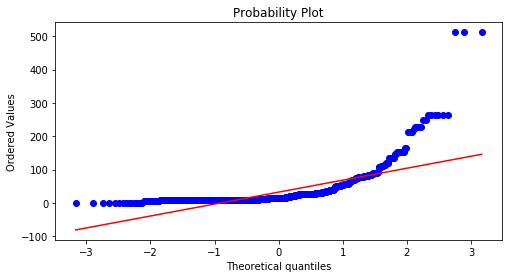

In [35]:
plt.figure(figsize=(8,4))
sns.distplot(titanic['fare'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(titanic['fare']) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição da taxa')

fig = plt.figure(figsize=(8,4))
res = stats.probplot(titanic['fare'], plot=plt)

plt.show()

In [36]:
titanic['log_fare'] = np.log(titanic['fare']+2)

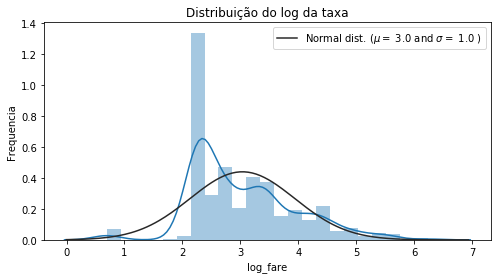

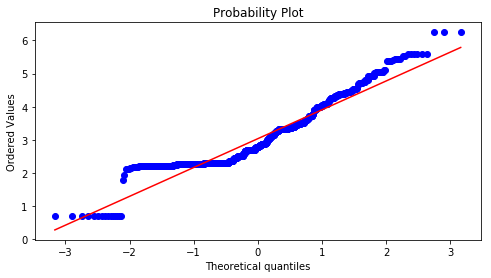

In [37]:
plt.figure(figsize=(8,4))
sns.distplot(titanic['log_fare'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(titanic['log_fare']) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição do log da taxa')

fig = plt.figure(figsize=(8,4))
res = stats.probplot(titanic['log_fare'], plot=plt)

plt.show()

In [38]:
titanic[['survived', 'log_fare']].corr()

,survived,log_fare
survived,1.00000,0.33174
log_fare,0.33174,1.00000


### PARCH and SIBSP

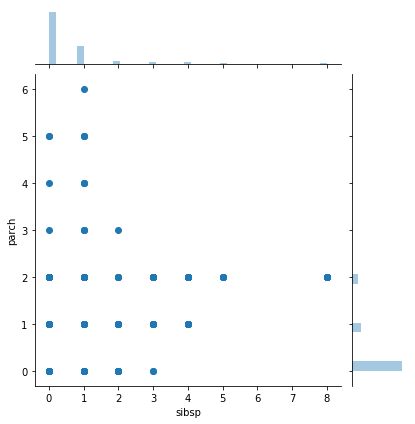

In [39]:
sns.jointplot(x='sibsp', y='parch', data=titanic);

In [40]:
titanic[['survived', 'sibsp']].corr()

,survived,sibsp
survived,1.000000,-0.035322
sibsp,-0.035322,1.000000


In [41]:
titanic[['survived', 'parch']].corr()

,survived,parch
survived,1.000000,0.081629
parch,0.081629,1.000000


In [42]:
titanic['FamilySize'] = titanic['parch'] + titanic['sibsp'] + 1

In [43]:
titanic[['survived', 'FamilySize']].corr()

,survived,FamilySize
survived,1.000000,0.016639
FamilySize,0.016639,1.000000


## Escolha das variáveis

In [44]:
list(titanic)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'n_deck',
 'isFemale',
 'dummy_embarked',
 'log_fare',
 'FamilySize']

In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,n_deck,isFemale,dummy_embarked,log_fare,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,8.0,0,0.0,2.224624,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0,1,1.0,4.294333,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,8.0,1,0.0,2.295057,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.0,1,0.0,4.009150,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,8.0,0,0.0,2.307573,1


In [46]:
titanic.corr()[:1]

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,n_deck,isFemale,dummy_embarked,log_fare,FamilySize
survived,1.0,-0.338481,-0.054924,-0.035322,0.081629,0.257307,-0.55708,-0.203367,-0.294804,0.543351,0.108669,0.33174,0.016639


In [48]:
temp = titanic[['survived','pclass','FamilySize','n_deck','dummy_embarked', 'age', 'fare', 'isFemale']]

In [49]:
temp.shape

(891, 8)

In [50]:
temp.dropna(inplace=True)

In [51]:
temp.shape

(889, 8)

In [52]:
temp.head()

,survived,pclass,FamilySize,n_deck,dummy_embarked,age,fare,isFemale
0,0,3,2,8.0,0.0,22.0,7.2500,0
1,1,1,2,3.0,1.0,38.0,71.2833,1
2,1,3,1,8.0,0.0,26.0,7.9250,1
3,1,1,2,3.0,0.0,35.0,53.1000,1
4,0,3,1,8.0,0.0,35.0,8.0500,0


#### Modelos

In [ ]:
temp.dropna(inplace=True)
    
X = temp
X = temp.drop('survived', axis = 1)
y = temp['survived']
    
scaler = StandardScaler()   
X = scaler.fit_transform(X) 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

In [ ]:
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

In [ ]:
lista_c = list(range(1,11))
penalidades = ['l1', 'l2']
paramentros_grid = dict(C=lista_c, penalty = penalidades)

In [ ]:
lr = LogisticRegression()
grid = GridSearchCV(lr, paramentros_grid, cv=10 ,scoring= 'accuracy')
grid.fit(X_train, y_train)
grid.predict(X_test)
grid.best_params_

In [ ]:
log_reg = LogisticRegression(C=4, penalty='l1')
log_reg.fit(X_train, y_train)

In [ ]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

In [ ]:
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)